In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk

import sys
import os

<h3>Intensity-Based Registration</h3>

In [28]:
# load fixed and moving images to register
fixed = sitk.ReadImage("LIDC_IDRI_axial_01.nii", sitk.sitkFloat32)
moving = sitk.ReadImage("2.000000-ROUTINE CHEST NON-CON-50599.nii", sitk.sitkFloat32)

In [29]:
def command_iteration(method):
    print(f"{method.GetOptimizerIteration():3} = {method.GetMetricValue():10.5f} : {method.GetOptimizerPosition()}")

R = sitk.ImageRegistrationMethod()
R.SetMetricAsMeanSquares()
R.SetOptimizerAsRegularStepGradientDescent(4.0, .01, 200)
R.SetInitialTransform(sitk.TranslationTransform(fixed.GetDimension()))
R.SetInterpolator(sitk.sitkLinear)

R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

outTx = R.Execute(fixed, moving)

print("-------")
print(outTx)
print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
print(f" Iteration: {R.GetOptimizerIteration()}")
print(f" Metric value: {R.GetMetricValue()}")

# sitk.WriteTransform(outTx, "registered_intensity_3D.tfm")

# if ("SITK_NOSHOW" not in os.environ):
#     resampler = sitk.ResampleImageFilter()
#     resampler.SetReferenceImage(fixed)
#     resampler.SetInterpolator(sitk.sitkLinear)
#     resampler.SetDefaultPixelValue(100)
#     resampler.SetTransform(outTx)

#     out = resampler.Execute(moving)
#     simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
#     simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
#     cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)
#     sitk.Show(cimg, "ImageRegistration1 Composition")

  0 = 524504.16406 : (-3.255615129775106, 2.323851908040856, -0.02612348128207581)
  1 = 489938.05798 : (-6.542470298055147, 4.603314059596745, -0.05133067023662149)
  2 = 452205.97909 : (-9.79413712880736, 6.932803701419525, -0.06319786983137111)
  3 = 416939.07293 : (-12.76161411445948, 9.61496881791417, -0.05479385386992799)
  4 = 402008.21773 : (-10.985549997729429, 8.695667364927838, -0.032860048884778496)
  5 = 399418.20032 : (-11.958846060734587, 8.924893475842117, -0.020605914326384638)
  6 = 392508.13118 : (-11.459455484396903, 8.903660965110012, -0.00802685422126979)
  7 = 391997.58840 : (-11.709047851419925, 8.904601948379502, 0.0062126989434687484)
  8 = 393637.68318 : (-11.584470001611326, 8.907717159856604, 0.015993025856166077)
  9 = 392361.30888 : (-11.641178011422403, 8.904091815816395, 0.04201817722665635)
 10 = 392964.07601 : (-11.610650811742476, 8.906043910869883, 0.04840894436402031)
 11 = 392639.32004 : (-11.588279340827354, 8.90756112767456, 0.07017538280170318)

In [ ]:
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(fixed)
resampler.SetInterpolator(sitk.sitkLinear)
resampler.SetDefaultPixelValue(100)
resampler.SetTransform(outTx)

out = resampler.Execute(moving)

interact(
    display_images_with_alpha,
    image_z=(0, fixed.GetSize()[2] - 1),
    alpha=(0.0, 1.0, 0.05),
    fixed=fixed,
    moving=out,
);

<h3>Intensity-Based Registration 2</h3>

In [3]:
# load fixed and moving images to register
fixed = sitk.ReadImage("LIDC_IDRI_axial_01.nii", sitk.sitkFloat32)
moving = sitk.ReadImage("2.000000-ROUTINE CHEST NON-CON-50599.nii", sitk.sitkFloat32)

In [6]:
def command_iteration(method):
    print(f"{method.GetOptimizerIteration():3} = {method.GetMetricValue():7.5f} : {method.GetOptimizerPosition()}")
    
pixelType = sitk.sitkFloat32

# fixed = sitk.ReadImage(fixed, sitk.sitkFloat32)
fixed = sitk.Normalize(fixed)
fixed = sitk.DiscreteGaussian(fixed, 2.0)

# moving = sitk.ReadImage(moving, sitk.sitkFloat32)
moving = sitk.Normalize(moving)
moving = sitk.DiscreteGaussian(moving, 2.0)

R = sitk.ImageRegistrationMethod()

R.SetMetricAsJointHistogramMutualInformation()

R.SetOptimizerAsGradientDescentLineSearch(learningRate=1.0,
                                          numberOfIterations=200,
                                          convergenceMinimumValue=1e-5,
                                          convergenceWindowSize=5)

R.SetInitialTransform(sitk.TranslationTransform(fixed.GetDimension()))

R.SetInterpolator(sitk.sitkLinear)

R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

outTx = R.Execute(fixed, moving)

  0 = -6.00525 : (-2.19289780372709e-05, 0.00019392330682359204, 9.511879942640494e-05)
  1 = -6.00525 : (-2.2107751643959872e-05, 0.00019550397928203058, 9.589411880297467e-05)
  2 = -6.00525 : (-2.2218068648539625e-05, 0.00019647937198468129, 9.637254847868369e-05)
  3 = -6.00525 : (-2.2328198981061636e-05, 0.0001974531136269462, 9.685016824670252e-05)
  4 = -6.00525 : (-2.2541899714930186e-05, 0.00019934259441025737, 9.777695746127515e-05)


In [11]:
print("-------")
print(outTx)
print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
print(f" Iteration: {R.GetOptimizerIteration()}")
print(f" Metric value: {R.GetMetricValue()}")

sitk.WriteTransform(outTx, "LIDC_IDRI_axial_02.tfm")

if ("SITK_NOSHOW" not in os.environ):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(1)
    resampler.SetTransform(outTx)

    out = resampler.Execute(moving)

    simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
    cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)
    sitk.Show(cimg, "Image Registration")

-------
itk::simple::Transform
 TranslationTransform (0x7f9f00f32e00)
   RTTI typeinfo:   itk::TranslationTransform<double, 3u>
   Reference Count: 2
   Modified Time: 19806
   Debug: Off
   Object Name: 
   Observers: 
     none
   Offset: [-2.1929e-05, 0.000193923, 9.51188e-05]

Optimizer stop condition: GradientDescentLineSearchOptimizerv4Template: Convergence checker passed at iteration 5.
 Iteration: 5
 Metric value: -6.005254598240413


<h3>Similarity 3D Transformation</h3>

In [2]:
# dicom_dir = "./LIDC-IDRI/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/"

# print("Reading Dicom directory:", dicom_dir)
# reader = sitk.ImageSeriesReader()

# dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)
# reader.SetFileNames(dicom_names)

# image = reader.Execute()

# size = image.GetSize()
# print("Image size:", size[0], size[1], size[2])

# print("Writing image:", "LIDC_IDRI_axial_01.nii")

# sitk.WriteImage(image, "LIDC_IDRI_axial_01.nii")

# if ("SITK_NOSHOW" not in os.environ):
#     sitk.Show(image, "Dicom Series")

In [3]:
# load fixed and moving images to register
fixed = sitk.ReadImage("LIDC_IDRI_axial_01.nii", sitk.sitkFloat32)
moving = sitk.ReadImage("2.000000-ROUTINE CHEST NON-CON-50599.nii", sitk.sitkFloat32)

In [4]:
R = sitk.ImageRegistrationMethod()

R.SetMetricAsCorrelation()

R.SetOptimizerAsRegularStepGradientDescent(learningRate=2.0,
                                           minStep=1e-4,
                                           numberOfIterations=500,
                                           gradientMagnitudeTolerance=1e-8)
R.SetOptimizerScalesFromIndexShift()

tx = sitk.CenteredTransformInitializer(fixed, moving, sitk.Similarity3DTransform())

In [5]:
def command_iteration(method):
    if (method.GetOptimizerIteration() == 0):
        print("Estimated Scales: ", method.GetOptimizerScales())
    print(f"{method.GetOptimizerIteration():3} = {method.GetMetricValue():7.5f} : {method.GetOptimizerPosition()}")

R.SetInitialTransform(tx)

R.SetInterpolator(sitk.sitkLinear)

R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

outTx = R.Execute(fixed, moving)

Estimated Scales:  (77766.81562058833, 77150.3963728492, 135162.23070764923, 2.0227160493790284, 2.0227160493905236, 0.6399999999987221, 152999.353016389)
  0 = -0.74770 : (-0.00019472214608236242, 0.0007758282028360315, -0.00017238707743845168, -10.664098433911642, 9.296493923421538, 5.276598119545042, 1.0043824363873257)
  1 = -0.74758 : (-0.00034569158220680487, 0.0010706838821493009, -0.00012854325238347166, -11.532498289729325, 8.808882351632258, 5.186512325603588, 1.0035172272329715)
  2 = -0.75363 : (-0.0007576793537345701, 0.0017871418883573138, -0.0003395423541208101, -11.904358123481611, 8.470578119196285, 4.32209737862947, 0.9961416233972097)
  3 = -0.74785 : (-0.0007475255563833205, 0.0015940725058443848, -0.00036630216528021935, -11.64018557510421, 8.89017219030324, 4.257858774437339, 1.0013309901035186)
  4 = -0.76019 : (-0.000265957832027513, 0.0004431785000307785, -0.0004495765795756355, -11.349610186086563, 8.73972443389697, 3.879848160897685, 1.0070875807631907)
  5 =

 48 = -0.75778 : (-0.0004868686032902062, 0.0011664687402186654, -0.0012532667203823751, -11.615568008765546, 8.802382254251158, 0.759085931945206, 1.0026428160810406)
 49 = -0.75767 : (-0.0004832271077744338, 0.001175455290332879, -0.0012688524307894944, -11.561271752368771, 8.797630329572428, 0.7284986340562106, 1.0026026506955332)
 50 = -0.75778 : (-0.0004852657935296395, 0.0011699977355536166, -0.0012717438088894204, -11.588809725798589, 8.799957108130165, 0.7139106931176491, 1.0026234085890045)
 51 = -0.75773 : (-0.0004860449300397669, 0.0011695621004522224, -0.00128311219039318, -11.589643710102413, 8.799945191147444, 0.6826718341784093, 1.00262384702503)
 52 = -0.75773 : (-0.00048767053934405336, 0.0011703911648296011, -0.001294748740201535, -11.588723837390399, 8.800044039898058, 0.6514355410561791, 1.002624224128653)
 53 = -0.75772 : (-0.0004895379383649946, 0.001170492968011019, -0.0013066425234779596, -11.590065324137871, 8.7999242124903, 0.6202145869813884, 1.00262545657944

 97 = -0.75775 : (-0.0004989197763180445, 0.0011965096162494487, -0.0016300002677508698, -11.599177799589414, 8.797477721463704, -0.1587409823130053, 1.002635698000005)
 98 = -0.75773 : (-0.0004983998717382307, 0.0011984103781870156, -0.0016327060672194271, -11.592362650260778, 8.796753308444657, -0.16249118801537948, 1.002629864668669)
 99 = -0.75774 : (-0.0004983137106766896, 0.0011984156712297918, -0.001637108376150532, -11.592658962636847, 8.796768419581214, -0.17029804713476024, 1.0026299994798002)
100 = -0.75774 : (-0.000498004463313925, 0.0011988384940487932, -0.001641606487124563, -11.592447003059759, 8.79678740868588, -0.17810764294786616, 1.002629912287873)
101 = -0.75775 : (-0.0004974324775871359, 0.0011993982721036826, -0.001646108816575869, -11.592912570091235, 8.796881294494197, -0.18590568790455297, 1.002630413775688)
102 = -0.75775 : (-0.0004969160061605184, 0.001200038374744689, -0.0016507684801045487, -11.59244388431882, 8.796802064044178, -0.19370370833887857, 1.0026

146 = -0.75779 : (-0.000503764406265655, 0.0011992235628643527, -0.0017849870705520599, -11.591582890538003, 8.795211899460663, -0.3639597210047606, 1.0026314992831915)
147 = -0.75780 : (-0.000503927610898653, 0.001198761231488521, -0.0017858832969957022, -11.59329318940628, 8.795374879607984, -0.36488870228202025, 1.0026329588849636)
148 = -0.75780 : (-0.0005040083124650311, 0.0011987947345422894, -0.00178809751665127, -11.593376749049217, 8.795370000700007, -0.3668400278799088, 1.0026330904080027)
149 = -0.75780 : (-0.0005041229613892657, 0.0011987875933357726, -0.0017903577051950619, -11.59330300884725, 8.795323873407257, -0.3687912099407149, 1.0026330962143601)
150 = -0.75780 : (-0.0005042049467715037, 0.001198765526570132, -0.0017926329898154932, -11.593427340271846, 8.795332118404742, -0.37074035082995843, 1.0026332957057784)
151 = -0.75780 : (-0.0005042816382366154, 0.00119869024883515, -0.001794978325794345, -11.593271876088345, 8.795277296381025, -0.3726865010378915, 1.0026331

195 = -0.75787 : (-0.0005053315367481499, 0.0011984388826697132, -0.0018688771056849386, -11.593857805596373, 8.794798092957455, -0.4161642018771175, 1.002635508069786)
196 = -0.75787 : (-0.0005053475490047617, 0.0011985002308791141, -0.0018701464802843987, -11.593926533273356, 8.794795183035292, -0.41664760662322325, 1.0026355973002146)
197 = -0.75787 : (-0.0005053246954933417, 0.0011985865793658747, -0.0018714593409622751, -11.593882828853644, 8.794789595152295, -0.41713388879638097, 1.0026355883590712)
198 = -0.75787 : (-0.0005053424334673574, 0.0011986013647587574, -0.001872757162176601, -11.593966312928664, 8.794780064453313, -0.41761487882506676, 1.0026356713329256)
199 = -0.75787 : (-0.0005052941562287048, 0.0011986927559517345, -0.0018741226712273113, -11.593899763501563, 8.794786523379305, -0.4180985528205414, 1.0026356680571598)
200 = -0.75787 : (-0.0005053277610317266, 0.0011987339108821804, -0.0018754493809777734, -11.594030415950808, 8.794759683182766, -0.4185682559775823,

244 = -0.75786 : (-0.0005054097227851309, 0.0011997338001041343, -0.0019130349586925968, -11.594362840389778, 8.79458330279271, -0.4285965426921715, 1.0026365813133231)
245 = -0.75786 : (-0.0005054323801988444, 0.0011997632129254914, -0.0019136612561737498, -11.59439978492254, 8.794578261569857, -0.4287127720860755, 1.002636628678795)
246 = -0.75786 : (-0.0005054309179797816, 0.0011997873144685102, -0.0019143160130683265, -11.594372792192537, 8.794577109298979, -0.42883180783032826, 1.002636608238822)
247 = -0.75786 : (-0.000505430136571133, 0.00119978601618097, -0.0019149424322904094, -11.594417048916096, 8.794575901406986, -0.42894555963687897, 1.002636646943664)
248 = -0.75786 : (-0.0005054152277325248, 0.001199803934005417, -0.001915599407640129, -11.594379965254035, 8.794573366414395, -0.42906182574380375, 1.0026366195772227)
249 = -0.75786 : (-0.0005054112443386666, 0.0011997965954057414, -0.0019162073412963524, -11.59443658302822, 8.794573538884064, -0.42916996490505316, 1.00263

In [6]:
print("-------")
print(outTx)
print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
print(f" Iteration: {R.GetOptimizerIteration()}")
print(f" Metric value: {R.GetMetricValue()}")

sitk.WriteTransform(outTx, "registered_similarity_3D.tfm")

-------
itk::simple::Transform
 Similarity3DTransform (0x7fb14e068d00)
   RTTI typeinfo:   itk::Similarity3DTransform<double>
   Reference Count: 3
   Modified Time: 3152
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1.00263 0.003863 0.00240839 
     -0.00386543 1.00263 0.0010088 
     -0.00240448 -0.00101807 1.00263 
   Offset: [-11.2282, 9.01899, 0.0637135]
   Center: [14.8988, 2.93955, -173.061]
   Translation: [-11.5945, 8.79454, -0.430839]
   Inverse: 
     0.99736 -0.00384513 -0.00239185 
     0.00384271 0.997362 -0.00101273 
     0.00239574 0.0010035 0.997367 
   Singular: 0
   Versor: [ -0.000505387, 0.00120006, -0.00192703, 0.999997 ]
   Scale = 1.00264

Optimizer stop condition: RegularStepGradientDescentOptimizerv4: Step too small after 271 iterations. Current step (6.10352e-05) is less than minimum step (0.0001).
 Iteration: 272
 Metric value: -0.7578561510144566


In [7]:
if ("SITK_NOSHOW" not in os.environ):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(1)
    resampler.SetTransform(outTx)

    out = resampler.Execute(moving)

    simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
    cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)
    sitk.Show(cimg, "ImageRegistration2 Composition")

<h3>Same Using Coronal Images</h3>

In [4]:
# load fixed and moving images to register
fixed = sitk.ReadImage("coronal_lung_window.nii", sitk.sitkFloat32)
moving = sitk.ReadImage("MIDRC-RICORD-1A_coronal_image.nii", sitk.sitkFloat32)

In [5]:
R = sitk.ImageRegistrationMethod()

R.SetMetricAsCorrelation()

R.SetOptimizerAsRegularStepGradientDescent(learningRate=2.0,
                                           minStep=1e-4,
                                           numberOfIterations=500,
                                           gradientMagnitudeTolerance=1e-8)
R.SetOptimizerScalesFromIndexShift()

tx = sitk.CenteredTransformInitializer(fixed, moving, sitk.Similarity3DTransform())

In [6]:
def command_iteration(method):
    if (method.GetOptimizerIteration() == 0):
        print("Estimated Scales: ", method.GetOptimizerScales())
    print(f"{method.GetOptimizerIteration():3} = {method.GetMetricValue():7.5f} : {method.GetOptimizerPosition()}")

R.SetInitialTransform(tx)

R.SetInterpolator(sitk.sitkLinear)

R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

outTx = R.Execute(fixed, moving)

Estimated Scales:  (159549.91317290755, 146227.91658701916, 153719.91236667268, 0.08212831833655813, 2.0227160493768808, 2.0227160493768808, 165485.19251481773)
  0 = -0.00046 : (2.6465332948649457e-05, -1.6777484869884517e-05, 3.0785497956854134e-05, -434.84669792219734, -281.2048273987524, -191.6793442971687, 0.9997742631165594)
  1 = -0.00084 : (5.4100741809217027e-05, -3.337495428734658e-05, 5.850657974652498e-05, -432.8467215261659, -281.19623041646815, -191.67482314110268, 0.999531096832105)
  2 = -0.00137 : (8.228873395705646e-05, -4.938601812879217e-05, 8.2527995223093e-05, -430.8467522647948, -281.1881268013181, -191.6672591972593, 0.9992756870575225)
  3 = -0.00203 : (0.00011131833845311484, -6.518333984631151e-05, 0.00010421363529379774, -428.8467967565722, -281.1806819340603, -191.65619308874668, 0.9990035221657736)
  4 = -0.00279 : (0.0001418278118030588, -8.139288479909817e-05, 0.0001250826820743031, -426.8468665496694, -281.173769527385, -191.6409848440496, 0.99870531303

 48 = -0.00719 : (0.007824170252391812, -0.00672816839640421, 0.008631154724630146, -418.8946669292604, -283.04706480003296, -186.8109223805491, 0.929751927576905)
 49 = -0.00716 : (0.007916064452222656, -0.006801307650263967, 0.00872376670386251, -418.9326068573223, -283.0765231627235, -186.77093841655, 0.9292938344382581)
 50 = -0.00714 : (0.008007849698828402, -0.006874455660799389, 0.008816016880473423, -418.97067832421, -283.10600751697, -186.73109882597635, 0.9288420281421266)
 51 = -0.00712 : (0.008101459834870805, -0.006949113039805203, 0.008909991319501109, -419.00756890788, -283.13605832430574, -186.69057742248938, 0.9283870714356066)
 52 = -0.00710 : (0.008194066186558135, -0.007023055440631401, 0.009002652317328903, -419.04520790711877, -283.165891610372, -186.6505868940372, 0.9279422373704809)
 53 = -0.00708 : (0.008287290379549402, -0.007097594033415727, 0.009095489380661478, -419.08247529563874, -283.1959388995211, -186.61040897525018, 0.9275000501744096)
 54 = -0.00705 

 98 = -0.00622 : (0.012859428430347585, -0.010885509506990472, 0.013402781725345701, -420.5274827125513, -284.71688790872435, -184.74488389683316, 0.9111547191968283)
 99 = -0.00621 : (0.012968358778966016, -0.010979251994105479, 0.013501244707651367, -420.55439222143906, -284.75424965436457, -184.7026225265784, 0.9108658799034941)
100 = -0.00619 : (0.013077016875590115, -0.01107292540518245, 0.01359933992247711, -420.5816338438945, -284.7915849161993, -184.66055091586875, 0.9105813995261248)
101 = -0.00617 : (0.013185936742789794, -0.01116699144114494, 0.013697536667131388, -420.6086115387003, -284.8290918095618, -184.61846188958702, 0.9102997554366689)
102 = -0.00616 : (0.013297097458305056, -0.01126316163679348, 0.013797580319965686, -420.6330339968406, -284.86745062906937, -184.5755878004133, 0.9100160943006874)
103 = -0.00615 : (0.013407804381295785, -0.011359104139110301, 0.013897081972478924, -420.6579897555564, -284.9057455406342, -184.53296437137942, 0.9097374473439765)
104 = 

148 = -0.00560 : (0.018476747830307297, -0.015907754741869645, 0.01831631155929959, -421.5496465614443, -286.780508915565, -182.6421300064528, 0.900174089205191)
149 = -0.00559 : (0.018589262300171067, -0.016011870896954467, 0.01841182457005335, -421.5644671156138, -286.8251063970149, -182.60092914361726, 0.9000188048469505)
150 = -0.00558 : (0.018701545410483814, -0.01611588396059582, 0.018507040620670635, -421.5793784904099, -286.8697607806026, -182.5598227762653, 0.8998658346307938)
151 = -0.00557 : (0.018813424161660257, -0.01621964130444198, 0.018601813371618505, -421.5947790947465, -286.91439226118985, -182.51887219022638, 0.8997153360678192)
152 = -0.00557 : (0.018925124819577803, -0.016323360011477158, 0.018696332887914665, -421.61018942243226, -286.95908757233605, -182.477994933291, 0.8995669119189926)
153 = -0.00556 : (0.01903681737269583, -0.016427196699277537, 0.01879072893080103, -421.6252487765277, -287.0039119778286, -182.43712822025122, 0.8994202998380555)
154 = -0.0055

198 = -0.00524 : (0.02390455568869253, -0.02104991899184879, 0.022811008185637402, -422.17163426897383, -289.1043910853899, -180.65034997415685, 0.8945035463489697)
199 = -0.00523 : (0.02400845421678884, -0.021150134312151105, 0.022895118288523447, -422.1813570156705, -289.1526408812653, -180.61183300136528, 0.894423665645154)
200 = -0.00522 : (0.024112030682194665, -0.02125007559804576, 0.022978949058502115, -422.1913859869012, -289.2009004567878, -180.57340689374644, 0.8943448435942459)
201 = -0.00522 : (0.024215418871351715, -0.021349877612953906, 0.023062545897574026, -422.20123929765754, -289.24922782879526, -180.5350205603027, 0.8942669784881426)
202 = -0.00521 : (0.024318511415918908, -0.021449430852213333, 0.02314587681860449, -422.2113286020759, -289.29756892983136, -180.49671288651314, 0.8941900910668282)
203 = -0.00521 : (0.024421335443641685, -0.021548761958762104, 0.023228947565459297, -422.2214895960254, -289.34594865465226, -180.45847297118257, 0.8941141297320513)
204 = 

248 = -0.00498 : (0.028817817420243075, -0.025789633646618116, 0.026741187861944158, -422.6073165286824, -291.565229089928, -178.77497496553673, 0.8914494442228313)
249 = -0.00498 : (0.028910353906779825, -0.02587760120864706, 0.02681423804842887, -422.61492179017955, -291.61505780044155, -178.73802336539632, 0.8914034894006798)
250 = -0.00497 : (0.02900267289792543, -0.025965242157486388, 0.02688707765328307, -422.62243135401286, -291.66490167023323, -178.70107263072933, 0.8913579424973954)
251 = -0.00497 : (0.02909479905422494, -0.02605257221300737, 0.026959722037709934, -422.6297688433935, -291.71476357005037, -178.6641116457885, 0.8913128485148327)
252 = -0.00496 : (0.029186688897291056, -0.02613954668820388, 0.027032110107946018, -422.63726662493616, -291.7646065926182, -178.62715736059258, 0.8912681875481512)
253 = -0.00496 : (0.02927842269037772, -0.026226239745520533, 0.02710434307076905, -422.6444166496708, -291.8144798918258, -178.59017500762528, 0.8912239529843579)
254 = -0.

298 = -0.00485 : (0.033216506498220805, -0.029719968891037122, 0.0301520320002981, -422.93269605954, -294.0459159195747, -176.90302681876338, 0.8895941574488879)
299 = -0.00485 : (0.03330043333279625, -0.029787184678514614, 0.030215696455726047, -422.93795884982615, -294.0949966369729, -176.86469181292563, 0.8895640679401875)
300 = -0.00485 : (0.03338416178410826, -0.029853835420755398, 0.030279154580712883, -422.94367449884584, -294.14401373401654, -176.82634024763246, 0.8895341612455899)
301 = -0.00485 : (0.03346780762082832, -0.029920006174434723, 0.030342483249064252, -422.9489420307564, -294.1930261383149, -176.7879185776273, 0.8895044307884883)
302 = -0.00485 : (0.03355135237260194, -0.029985673781758267, 0.030405656259509528, -422.95391187380744, -294.2420212413715, -176.74943522597536, 0.8894749062701478)
303 = -0.00485 : (0.033634713541261484, -0.03005076942949777, 0.030468639476372777, -422.9592429325149, -294.29096052420465, -176.71092919065504, 0.889445571488041)
304 = -0.0

348 = -0.00487 : (0.037255458536114075, -0.032376347176221905, 0.03315481266865403, -423.1544813764802, -296.4541017603161, -174.92470617485887, 0.8882588949070673)
349 = -0.00487 : (0.03733300919568129, -0.03241355031257546, 0.033211356388754464, -423.1578764795923, -296.50114900037386, -174.88370328029063, 0.8882346028609143)
350 = -0.00488 : (0.03741044987023052, -0.032450098853786066, 0.03326777140999074, -423.1610356885311, -296.54814682812463, -174.84262493083295, 0.8882103737415891)
351 = -0.00488 : (0.03748775452007164, -0.03248597855522004, 0.03332404073716766, -423.16426263911814, -296.5950847624139, -174.80148341078245, 0.8881862329503012)
352 = -0.00488 : (0.03756493441497056, -0.032521192691645454, 0.033380168382770144, -423.1673105329846, -296.64197357202494, -174.76027227431743, 0.8881621744484324)
353 = -0.00488 : (0.037641971232095034, -0.03255573423511831, 0.033436164816214066, -423.1704564051164, -296.68880269991854, -174.7190006799691, 0.888138168209601)
354 = -0.00

398 = -0.00496 : (0.040963510381893976, -0.03341724700964328, 0.035802576190613875, -423.2798073476353, -298.72167399441963, -172.7798033740267, 0.8871177526587429)
399 = -0.00496 : (0.04103387245360635, -0.03342125862254759, 0.035851473660947354, -423.28177259412803, -298.76480209686133, -172.7346112883706, 0.8870963718838558)
400 = -0.00497 : (0.04110407725577813, -0.03342463847667082, 0.035900199230441576, -423.2835964027945, -298.80782860677283, -172.68931654955978, 0.8870750372052533)
401 = -0.00497 : (0.04117411936855588, -0.033427387546540885, 0.03594874531110859, -423.2854338061601, -298.85074866272805, -172.64392147137895, 0.8870537641586862)
402 = -0.00497 : (0.04124399990710135, -0.033429512778646496, 0.035997120426254185, -423.28720239558226, -298.8935634441836, -172.59842436015452, 0.8870325417753403)
403 = -0.00498 : (0.04131371325718576, -0.033431012918292057, 0.036045318584586615, -423.2890774682673, -298.9362681764185, -172.55282819067432, 0.8870113880837667)
404 = -0.

448 = -0.00526 : (0.044269382694797826, -0.03292181366846587, 0.038035428051871156, -423.375067431537, -300.7414713107051, -170.39957345823993, 0.8861209732747475)
449 = -0.00527 : (0.0443308315329036, -0.03289957896773888, 0.03807591475144099, -423.3773681349676, -300.77909357414006, -170.34971868886973, 0.8861025168763151)
450 = -0.00527 : (0.04439209001360326, -0.03287696756369712, 0.03811625562608666, -423.3797678803648, -300.8166200768102, -170.2997964606939, 0.8860841113445634)
451 = -0.00528 : (0.04445316294025254, -0.03285398361832777, 0.03815645211527046, -423.3821480858225, -300.8540539243217, -170.24980378321933, 0.8860657608497723)
452 = -0.00529 : (0.04451404636979439, -0.03283063680518191, 0.03819651028573491, -423.3845635397697, -300.891396361252, -170.19974447662057, 0.8860474663850846)
453 = -0.00530 : (0.04457473932277945, -0.03280693437657291, 0.038236432787613905, -423.3870879898835, -300.9286463151928, -170.14962168395024, 0.8860292149993418)
454 = -0.00531 : (0.04

499 = -0.00580 : (0.04717413976406051, -0.03144311743260989, 0.03996217030780487, -423.5481648101864, -302.5740962327166, -167.79806302783138, 0.8852370760326183)


In [7]:
print("-------")
print(outTx)
print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
print(f" Iteration: {R.GetOptimizerIteration()}")
print(f" Metric value: {R.GetMetricValue()}")

sitk.WriteTransform(outTx, "similarity_coronal_3D.tfm")

-------
itk::simple::Transform
 Similarity3DTransform (0x7fb212a0dea0)
   RTTI typeinfo:   itk::Similarity3DTransform<double>
   Reference Count: 3
   Modified Time: 4681
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     0.880659 -0.0732077 -0.0521975 
     0.0679554 0.87847 -0.0855441 
     0.0588728 0.0810948 0.879547 
   Offset: [-370.228, -285.592, -204.708]
   Center: [268.798, 280.383, 13.7158]
   Translation: [-423.548, -302.574, -167.798]
   Inverse: 
     1.1238 0.0867172 0.0751269 
     -0.0934196 1.12101 0.103484 
     -0.0666086 -0.109162 1.12238 
   Singular: 0
   Versor: [ 0.0471741, -0.0314431, 0.0399622, 0.997592 ]
   Scale = 0.885237

Optimizer stop condition: RegularStepGradientDescentOptimizerv4: Maximum number of iterations (500) exceeded.
 Iteration: 500
 Metric value: -0.0058029883516913135


In [8]:
if ("SITK_NOSHOW" not in os.environ):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(1)
    resampler.SetTransform(outTx)

    out = resampler.Execute(moving)

    simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
    cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)
    sitk.Show(cimg, "ImageRegistration2 Composition")

<h3>B-Spline Method</h3>

In [8]:
# # load fixed and moving images to register
# fixed = sitk.ReadImage("LIDC_IDRI_axial_01.nii", sitk.sitkFloat32)
# moving = sitk.ReadImage("2.000000-ROUTINE CHEST NON-CON-50599.nii", sitk.sitkFloat32)

In [ ]:
# transformDomainMeshSize = [8] * moving.GetDimension()
# tx = sitk.BSplineTransformInitializer(fixed,
#                                       transformDomainMeshSize)

# print("Initial Parameters:")
# print(tx.GetParameters())

# R = sitk.ImageRegistrationMethod()
# R.SetMetricAsCorrelation()

# R.SetOptimizerAsLBFGSB(gradientConvergenceTolerance=1e-5,
#                        numberOfIterations=100,
#                        maximumNumberOfCorrections=5,
#                        maximumNumberOfFunctionEvaluations=1000,
#                        costFunctionConvergenceFactor=1e+7)
# R.SetInitialTransform(tx, True)
# R.SetInterpolator(sitk.sitkLinear)

# R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

# outTx = R.Execute(fixed, moving)

# print("-------")
# print(outTx)
# print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
# print(f" Iteration: {R.GetOptimizerIteration()}")
# print(f" Metric value: {R.GetMetricValue()}")

# sitk.WriteTransform(outTx, "registration_bspline.tfm")

# if ("SITK_NOSHOW" not in os.environ):
#     resampler = sitk.ResampleImageFilter()
#     resampler.SetReferenceImage(fixed)
#     resampler.SetInterpolator(sitk.sitkLinear)
#     resampler.SetDefaultPixelValue(100)
#     resampler.SetTransform(outTx)

#     out = resampler.Execute(moving)
#     simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
#     simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
#     cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)
#     sitk.Show(cimg, "BSpline1 Composition")

Initial Parameters:
(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

LBFGSBOptimizerv4 (0x7fb0dd8a9250): LBFGSB optimizer does not support scaling. All scales are set to one.



Estimated Scales:  ()
  0 = -0.58314 : (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Estimated Scales:  ()
  0 = -0.58429 : (-6.334266208882738e-23, 1.0545882855737496e-10, 5.8076423529270836e-08, 5.597419779972902e-07, 6.981871660970532e-07, -2.8738693656542973e-07, -8.09977031537984e-07, -2.533222140279986e-07, -8.262529990588946e-09, -5.863025327239573e-14, 2.3580872916295213e-23, -3.299695581934666e-09, -8.333137450729793e-07, -1.619090371933692e-06, 8.751471991225034e-06, 7.614612435491788e-06, -2.4033110089774308e-06, -1.20532483894695e-05, -1.15185701642765e-05, -2.7847173365841567e-06, -7.310134732098514e-08, -3.130036770564414e-14, -1.1061386707327455e-06, -2.9800784298931833e-05, -5.384621845861299e-05, -3.2754805621525047e-06, 3.791727290657962e-06, -1.5411185315860056e-07, -8.510553832480456e-06, -2.804731975561712e-05, -2.4107548168636623e-05, -3.407844000769429e-06, -1.2905498432888933e-08, -1.0676131385412065e-05, -0.00010821001218196947, -9.503841195382847e-05, -8.966114968226154e-06, -7.225734911738698e-07, 2.6452867916335303e-07, -2.822651483188518e-0

Estimated Scales:  ()
  0 = -0.58834 : (-3.167133104441369e-22, 5.272941427868749e-10, 2.903821176463542e-07, 2.798709889986451e-06, 3.490935830485266e-06, -1.4369346828271486e-06, -4.04988515768992e-06, -1.2666110701399932e-06, -4.1312649952944734e-08, -2.9315126636197864e-13, 1.1790436458147605e-22, -1.6498477909673333e-08, -4.166568725364897e-06, -8.09545185966846e-06, 4.375735995612517e-05, 3.807306217745894e-05, -1.2016555044887154e-05, -6.0266241947347494e-05, -5.7592850821382505e-05, -1.3923586682920783e-05, -3.655067366049257e-07, -1.565018385282207e-13, -5.530693353663728e-06, -0.00014900392149465915, -0.00026923109229306494, -1.6377402810762524e-05, 1.8958636453289807e-05, -7.705592657930027e-07, -4.2552769162402276e-05, -0.00014023659877808562, -0.00012053774084318311, -1.7039220003847145e-05, -6.452749216444466e-08, -5.338065692706033e-05, -0.0005410500609098473, -0.0004751920597691423, -4.483057484113077e-05, -3.6128674558693493e-06, 1.322643395816765e-06, -1.4113257415942

Estimated Scales:  ()
  0 = -0.60265 : (-1.330195903865375e-21, 2.2146353997048743e-09, 1.2196048941146877e-06, 1.1754581537943094e-05, 1.4661930488038119e-05, -6.0351256678740246e-06, -1.7009517662297664e-05, -5.319766494587971e-06, -1.7351312980236789e-07, -1.2312353187203104e-12, 4.951983312421995e-22, -6.9293607220628e-08, -1.7499588646532566e-05, -3.4000897810607536e-05, 0.00018378091181572574, 0.00015990686114532757, -5.046953118852605e-05, -0.00025311821617885947, -0.00024188997344980654, -5.847906406826729e-05, -1.535128293740688e-06, -6.57307721818527e-13, -2.322891208538766e-05, -0.0006258164702775685, -0.0011307705876308727, -6.87850918052026e-05, 7.96262731038172e-05, -3.2363489163306116e-06, -0.0001787216304820896, -0.0005889937148679595, -0.000506258511541369, -7.1564724016158e-05, -2.710154670906676e-07, -0.00022419875909365338, -0.0022724102558213588, -0.0019958066510303977, -0.00018828841433274923, -1.5174043314651268e-05, 5.555102262430414e-06, -5.927568114695889e-06,

Estimated Scales:  ()
  0 = -0.65347 : (-5.384126277550327e-21, 8.964000427376873e-09, 4.936495999988022e-06, 4.757806812976967e-05, 5.934590911824953e-05, -2.442788960806153e-05, -6.884804768072864e-05, -2.1532388192379886e-05, -7.023150492000605e-07, -4.983571528153638e-12, 2.0043741978850934e-21, -2.8047412446444664e-07, -7.083166833120325e-05, -0.00013762268161436383, 0.000743875119254128, 0.0006472420570168021, -0.00020428143576308166, -0.0010245261131049076, -0.0009790784639635026, -0.00023670097360965333, -6.2136145222837375e-06, -2.660531254979752e-12, -9.402178701228339e-05, -0.002533066665409206, -0.0045769285689821046, -0.00027841584778296293, 0.0003222968197059268, -1.3099507518481049e-05, -0.0007233970757608388, -0.0023840221792274558, -0.002049141594334113, -0.0002896667400654015, -1.0969673667955594e-06, -0.0009074711677600257, -0.009197851035467405, -0.00807826501607542, -0.0007621197722992232, -6.141874674977894e-05, 2.248493772888501e-05, -2.3992537607102407e-05, -0.0

  1 = -0.57181 : (-3.777881936873394e-20, 8.05327998816738e-08, 3.6846513988947526e-05, 0.00035265460860002415, 0.00043935597274210876, -0.00018180354988848785, -0.0005233786113894163, -0.0001706487921274064, -6.090068476976028e-06, -1.2516327388506313e-10, 1.3317224937304342e-20, -1.123451913288008e-06, -0.00022038950618715074, 0.0006682088792923929, 0.006275361782802059, 0.004684139692877303, -0.0014530017066483503, -0.0074082132294289536, -0.007263069226591944, -0.0018309210036716696, -5.182002375030203e-05, -9.053551771020269e-11, -0.00048201595829538394, -0.011864069471991598, -0.01735937569216951, 0.0025387976504025614, 0.0023190821697922966, -4.1887479835203676e-05, -0.004881837236514707, -0.01685809837652296, -0.015025115160918496, -0.002207377444425822, -9.530846390737125e-06, -0.0057099730944142465, -0.05642760906949139, -0.04543027512624977, -0.0034475068987990898, -0.0004295529268623171, 0.00015353396400603875, -0.00010201779376466574, -0.005555742458720729, -0.024119934588

  1 = -0.69287 : (-1.5757772219827202e-20, 3.188224150973337e-08, 1.5154936029575505e-05, 0.0001452717245328435, 0.00018103528099900625, -7.48237793016576e-05, -0.000214400874021309, -6.928344341162192e-05, -2.4276175957226396e-06, -4.346832204545651e-11, 5.62705115420728e-21, -5.504181271393478e-07, -0.00011872408248197322, 0.00012042610676060844, 0.0025152048867736533, 0.001939964499601959, -0.0006041550179774872, -0.003068753226620695, -0.0029913801422833727, -0.0007472128065015112, -2.081800483702972e-05, -3.080044892924076e-11, -0.00021826788340927056, -0.005521102981401384, -0.008670209538139045, 0.0006237311579540223, 0.0009617208199956158, -2.2318185138582476e-05, -0.0020550406810384524, -0.007019007958831728, -0.0062043948994726745, -0.0009037689268264659, -3.797720686732903e-06, -0.0024453605524188994, -0.024322080995149056, -0.020039376270460128, -0.001622052452934478, -0.0001793051435428755, 6.445033606906297e-05, -4.897830856828199e-05, -0.0023538529218502416, -0.010076247

  2 = -0.70537 : (-2.3843757886905733e-20, 4.787099924998121e-08, 2.1143282953413708e-05, 0.000211214856127994, 0.0002718966704073149, -0.00011732571525907509, -0.0003436457372890993, -0.00011808239333396644, -4.803545575956031e-06, -4.801700632613297e-10, 8.628337528237245e-21, -6.217627516272281e-07, -0.00010932407018467212, 0.00047336380756190567, 0.0035962020879172656, 0.002741913948038065, -0.0008848544937163906, -0.004551213863093897, -0.004580285672078009, -0.0012159796188914722, -3.834333816631435e-05, -4.820184538988409e-10, -0.00023729561534110744, -0.005719679126462525, -0.00800660543793037, 0.0016485517122689919, 0.001247773337276162, 9.764118258322483e-06, -0.002754470783437808, -0.010018045045685046, -0.009321742359962464, -0.0014413312909954063, -7.425833264567209e-06, -0.0027812666809098885, -0.02634883672407805, -0.02076049077085711, -0.0016524715136350147, -0.0002723530187855195, 9.155540634078063e-05, -2.7674102770007273e-05, -0.003031384932319024, -0.014173453304542

  3 = -0.72025 : (-3.1889228492322224e-20, 6.298732686037365e-08, 2.6260941740588597e-05, 0.00027369511180006255, 0.0003655426514714636, -0.00016448827693234843, -0.0004925098661334456, -0.0001781141900374593, -8.112025723817053e-06, -1.6832690082081966e-09, 1.1767247704182475e-20, -6.632882799011889e-07, -8.898219736695044e-05, 0.0008467361330050776, 0.0045532111069826065, 0.003502836434587893, -0.0011656584230474209, -0.006083313877216285, -0.006270839305054263, -0.001746406598295488, -6.087332479181032e-05, -1.777370965712521e-09, -0.00024183059336255268, -0.005497563470415836, -0.0065655284662203914, 0.002650801890556091, 0.001467654977583525, 6.33826507423739e-05, -0.0033445031884668775, -0.012859170720699142, -0.012553208472306423, -0.0020523435489655296, -1.2383988156724098e-05, -0.0029221052156116244, -0.026341162592207538, -0.019759267359849158, -0.001567244928601266, -0.0003703746752523307, 0.00011757530622873979, 7.467943887092057e-06, -0.0035465567052808634, -0.018088859708

  4 = -0.70907 : (-4.950690707081712e-20, 9.943559702298669e-08, 3.769182391028032e-05, 0.00042866167354726125, 0.0006108450023108528, -0.0003050970985490445, -0.0009395031966026534, -0.00036994149875945695, -1.9922870278182835e-05, -9.09164512330524e-09, 1.8924858438900022e-20, -6.799649506111192e-07, -4.421801814868086e-06, 0.0018830700295832926, 0.006775384804165896, 0.005368083462976157, -0.001928473712563113, -0.0102327813588656, -0.010977482062968969, -0.003302659154660664, -0.00013464780610947122, -9.898895304121455e-09, -0.0002131054722526733, -0.0037291172664425136, -0.0006319129246408354, 0.005293939731906188, 0.0018977555495143716, 0.00023148311078501912, -0.004652955688622464, -0.019889373091474413, -0.02126864281657835, -0.003857284473283161, -2.967046254493131e-05, -0.0027985344556711277, -0.021071551636417125, -0.0125721010877357, -0.0010124575896268261, -0.0006305661891333101, 0.00018043955794887917, 0.00012052252380762417, -0.00452550736149532, -0.027848674920069517, -

  4 = -0.73248 : (-3.916789645711167e-20, 7.804577257003917e-08, 3.0983561436884936e-05, 0.00033771887881212163, 0.00046688826036012, -0.00022258020549764267, -0.0006771832338796472, -0.0002573668157761827, -1.2991625241537079e-05, -4.744007666812723e-09, 1.47243837267919e-20, -6.701781745212372e-07, -5.40464344369715e-05, 0.0012748930153230937, 0.005471292591431368, 0.004273455204334357, -0.0014808122718426233, -0.007797648481236327, -0.008215368472793725, -0.0023893656338272065, -9.135293374785538e-05, -5.132743738796971e-09, -0.00022996293339386695, -0.004766937544022428, -0.004114080781700221, 0.0037428028966274176, 0.0016453491749547954, 0.00013283263122233904, -0.003885084698902446, -0.0157636685269317, -0.016153952604300758, -0.00279804711176095, -1.9525820537931404e-05, -0.002871052488786339, -0.024164045540155384, -0.01678992059436193, -0.0013380369308805457, -0.00047787167767280214, 0.00014354740085443986, 5.417595626647365e-05, -0.003951005949189507, -0.02212108529436178, -0

  5 = -0.74601 : (-4.2232466993096716e-20, 8.626245715007081e-08, 3.396783709088122e-05, 0.0003837168901700411, 0.0005448732687886427, -0.00027142150958773804, -0.0008368470483173084, -0.0003300664039434071, -1.8017131321570053e-05, -1.0189126794467644e-08, 1.597308748210278e-20, -6.633657655943923e-07, -2.920336723328732e-05, 0.0015257127753136963, 0.006050655458334812, 0.004850079932268391, -0.0017225181931588302, -0.00914075310983703, -0.009768406833269641, -0.002926716745766559, -0.00011980199721615427, -1.1451298774570607e-08, -0.00022007916436342614, -0.0042086541158796505, -0.0024999168083469775, 0.00432478157486637, 0.0017727490322759951, 0.00018937983079373482, -0.004264363748410986, -0.017876160359477384, -0.018942589981883785, -0.003429140764885864, -2.683942662234585e-05, -0.0028184931626989, -0.022517818751139566, -0.014692441279305114, -0.0012194014275597133, -0.0005560669937860788, 0.00016159214201262194, 8.556778457104392e-05, -0.004212066627453933, -0.02508766465117183

  6 = -0.74800 : (-4.6407270232855206e-20, 9.74224385066424e-08, 3.976000035061254e-05, 0.0004819903620936188, 0.0007142664243415298, -0.00038952855980211925, -0.0012138854353018742, -0.0005042050933648366, -3.0467672402029782e-05, -2.5894267219358613e-08, 1.7610253543280196e-20, -6.638683609964437e-07, 1.6902264340199132e-06, 0.0018407375434601767, 0.0071178070004517405, 0.006098249465572394, -0.0023011534012166903, -0.012239308218016064, -0.01335330813642627, -0.004175274544550826, -0.0001879263559454773, -3.023769913023585e-08, -0.000209854383485845, -0.0034851722297173844, -0.0006699787631072273, 0.004858551280644605, 0.002031249830426731, 0.000304060506176908, -0.005156138775766338, -0.022707819921926064, -0.02532370106965244, -0.00490461300450111, -4.517677602998581e-05, -0.002852459617417821, -0.02078703679695883, -0.01223262456312275, -0.0012803319766107727, -0.0007315334580917413, 0.00020235966149080255, 0.0001504282041373178, -0.004853869182814383, -0.03189143111955265, -0.02

  7 = -0.75600 : (-4.587802663337202e-20, 9.639286438457807e-08, 3.9742635335886663e-05, 0.00048231333266356483, 0.0007159656016520735, -0.000395299939594953, -0.0012291878710198965, -0.0005129061573667056, -3.1410883846879154e-05, -2.8513620565221378e-08, 1.738647639138438e-20, -6.650810471533344e-07, -5.703113589409576e-06, 0.0017834514012104456, 0.007078894339182703, 0.0060996030241301956, -0.0023167779304731325, -0.012299235775096956, -0.013453197256650139, -0.004226697290018788, -0.00019219126240967147, -3.369948639183546e-08, -0.00021007398179650205, -0.0036238909769636465, -0.0011932401358633231, 0.004654679383292803, 0.002018265526853329, 0.0003134946148774716, -0.005130100673846525, -0.022739938246095732, -0.025467570931066705, -0.004964661649825141, -4.669492311590055e-05, -0.002854646147141723, -0.021075917269218383, -0.01280999307200532, -0.0013893516994110604, -0.0007352825239471427, 0.00020385263828570223, 0.00015606992978159286, -0.004824194857762998, -0.0319282721121574

  8 = -0.75983 : (-4.7297076238216585e-20, 1.0330984355992651e-07, 4.3293942720928746e-05, 0.000536411385250102, 0.00080808649706333, -0.000464964308747264, -0.0014483580110228587, -0.0006170385529065999, -3.9441825971635364e-05, -4.13100717563294e-08, 1.7907207974199466e-20, -6.645031786969696e-07, 1.6448955436961964e-06, 0.0019125112058720219, 0.007664107366553155, 0.006768198185982503, -0.002634000371785043, -0.013982415714261261, -0.015461926391023775, -0.004957893480983223, -0.00023462908820939628, -4.941110459428203e-08, -0.00020308996625738088, -0.0034188789245190475, -0.0008619650537934293, 0.004783959205913909, 0.002148092837551372, 0.0003943193995214982, -0.005523829034051767, -0.025254483613601827, -0.028985007421744754, -0.00582492010776628, -5.872062102112946e-05, -0.002855231172477336, -0.02043897761033986, -0.012271812486814753, -0.0015610300403647742, -0.0008310982489765786, 0.00022797170399967186, 0.0002039517193327131, -0.005081970135539364, -0.035449374912048456, -0.

  9 = -0.76185 : (-4.7414225972747284e-20, 1.1552383828110185e-07, 5.0197283035447124e-05, 0.0006379554741789274, 0.0009801220432551067, -0.0006043685119066384, -0.0018805812351012953, -0.000826317015439701, -5.635076813409401e-05, -7.140634800230029e-08, 1.7771359650564177e-20, -6.764441776893933e-07, -9.496853136215837e-07, 0.002052150141874236, 0.008728170870417842, 0.008015857215981241, -0.0032441093549984016, -0.01716268880126192, -0.019324512197056876, -0.006401835629798836, -0.0003218910682374715, -8.65149148275995e-08, -0.00019856055281386423, -0.0035234264374619743, -0.001563566669746792, 0.004677465915197465, 0.002390492769476846, 0.0005588309831234278, -0.006184233847846109, -0.02987399431870149, -0.03568359522297061, -0.007528501021273417, -8.418476836199833e-05, -0.002946677213012439, -0.020938443018956365, -0.013386044118418426, -0.0021398639246667595, -0.0010096449282145357, 0.00027540272767822204, 0.00030245872092970674, -0.0055002050331152885, -0.04195669295617673, -0.

 10 = -0.76777 : (-4.839274603597173e-20, 1.3594796795660543e-07, 5.952289690613448e-05, 0.0007628760766156596, 0.0011861618425459328, -0.0007709880676001171, -0.0023912201392264454, -0.0010729531053878232, -7.646443811951489e-05, -1.0801077127315618e-07, 1.7944374680635928e-20, -7.007288420878228e-07, 5.374043141510102e-06, 0.0023784965444784, 0.01021098736538281, 0.00952321825925395, -0.003976734217742414, -0.02093334364618524, -0.023924891164733807, -0.008126539203959877, -0.0004258994378065087, -1.3158774358916265e-07, -0.00019879536933780967, -0.0037302778248654222, -0.001969111752045818, 0.005011345347855894, 0.002692677869601607, 0.0007623821349267616, -0.006921950610906448, -0.035349864797133354, -0.04367063171525265, -0.009561982202760323, -0.00011450502722471118, -0.0031139011889772692, -0.02234364665705298, -0.015227355228652355, -0.002770540945272622, -0.0012251337052799727, 0.00033755775203107635, 0.00044323586260107455, -0.0059461774311591435, -0.0496780869904692, -0.0369

 11 = -0.77525 : (-4.830812653660325e-20, 1.9961078991284823e-07, 8.626115637454575e-05, 0.0010899660269604646, 0.0017096906067086892, -0.0012087084395645655, -0.003688196643456529, -0.0017032518315488157, -0.00013001007209403897, -2.1213105169524852e-07, 1.7068809816655798e-20, -7.940024523104926e-07, 2.1830631565984887e-05, 0.003433645036448188, 0.014410606038715305, 0.013353896770201733, -0.00586068793820853, -0.03029809587148021, -0.03556487292119013, -0.012562509026954865, -0.0006971827548370693, -2.626076519830059e-07, -0.0002212705216643719, -0.0050377231156089495, -0.003777250377121042, 0.006300386093440285, 0.003355508887935086, 0.0013410054009091996, -0.008354093829553438, -0.048601569641384054, -0.06369295292349908, -0.014817362756028404, -0.00019576329715922898, -0.003705329147981732, -0.029380460594579647, -0.02361521375619768, -0.004639274718185439, -0.0018144511645165665, 0.0005214800000832877, 0.0009089364314406915, -0.006678524599602962, -0.06853932345590913, -0.054338

 12 = -0.77745 : (-4.684606313125089e-20, 2.4930897821072004e-07, 0.00010166990901951524, 0.0012284744135434152, 0.0019101825127551078, -0.001384867655003536, -0.004173779672937161, -0.0019452429013568269, -0.0001524235868963463, -2.579630853022738e-07, 1.5830787105238063e-20, -8.349217219256074e-07, 5.786352845387466e-05, 0.004417163393230934, 0.016841148062552568, 0.014844786115614747, -0.006554648868970969, -0.03363057974581856, -0.03997915602165929, -0.014240452307272052, -0.000796064268773302, -3.220323021876576e-07, -0.00023551115303420062, -0.0056562715406479535, -0.0033329585011654087, 0.008074815339214263, 0.0034721463261046305, 0.0018212047395469028, -0.007996488337395056, -0.05274021391030408, -0.07066853077564787, -0.016775031960401948, -0.00022773723431664054, -0.003914515519635336, -0.032856404140035086, -0.027883540257473357, -0.005434024645136108, -0.0021007078369797137, 0.0006961981935566393, 0.001437541794236918, -0.006330656340746775, -0.07454974994717388, -0.0601055

 13 = -0.77926 : (-4.554519052752392e-20, 2.7955790524469333e-07, 0.00011026607160133023, 0.0012940141537328713, 0.0019965490646538468, -0.001458406922945715, -0.004363661182984694, -0.0020453665804334715, -0.00016282001868564246, -2.811938165942062e-07, 1.4819002967083435e-20, -8.712114212564327e-07, 7.350051266046281e-05, 0.004974837351783305, 0.01814518769372629, 0.015498988483087476, -0.006815475402503635, -0.03485164683131693, -0.04176542292427625, -0.014923927021875819, -0.0008351261018403887, -3.521347789335002e-07, -0.0002498504670929473, -0.006326350833083363, -0.003648091902572352, 0.009012591217336507, 0.00346467027452203, 0.0021341164169572575, -0.007397399822521895, -0.05388227818396142, -0.07313416207501859, -0.017545013559058513, -0.00024144504879439497, -0.0040194337019318445, -0.03552916729331528, -0.031446774124249746, -0.0059910568488994315, -0.0022510894967086186, 0.0008254895528752648, 0.0018825928234958416, -0.005776708546415776, -0.07628730664967033, -0.061977928

 14 = -0.78226 : (-4.227663437430063e-20, 3.662088279356587e-07, 0.00013597378437484308, 0.0015100005168862, 0.002291899440663166, -0.0017043243554808445, -0.005030791811246001, -0.002393773095796102, -0.000197269652561441, -3.565283942162417e-07, 1.1820802819487238e-20, -9.600603643348526e-07, 0.00011740287234373116, 0.006524708098576819, 0.02204343418094138, 0.017720902801713866, -0.007740469811688043, -0.03930987695239659, -0.04800644956624296, -0.017293993121722525, -0.0009730996550820132, -4.4818456624513856e-07, -0.0002870381111227748, -0.008148611783638942, -0.004752245689569042, 0.011376300704610959, 0.0034885991256205845, 0.0030474153299807055, -0.005917531399109503, -0.05842044663173007, -0.08203110641006467, -0.020199727381022256, -0.0002873603219601559, -0.004289755584381362, -0.0428403755764416, -0.04160147081056188, -0.007782348383092279, -0.00274217101606328, 0.0012317612511224619, 0.003329951769578257, -0.0041171222781132555, -0.08291793776198178, -0.06892437062338802, 

 15 = -0.78361 : (-3.9862215551616246e-20, 4.6504162570849383e-07, 0.00016436143464957002, 0.0017677126340487931, 0.002670473520867976, -0.0020030542484257303, -0.0058596875083388586, -0.002838486043250655, -0.0002418244349884842, -4.4826833231370073e-07, 7.664278448856962e-21, -1.0279234903513603e-06, 0.0001770777814076249, 0.008255114261676879, 0.026385122721294747, 0.02046719637613196, -0.008871214303189011, -0.04499150359354346, -0.05614420426071645, -0.02031826807669205, -0.0011458118602380865, -5.649899372592851e-07, -0.0003206731496483653, -0.009838836865441888, -0.005649958429457482, 0.013525543100579568, 0.0033936858383042338, 0.004175012448054664, -0.004193696199792589, -0.06432997526354158, -0.09306784213867178, -0.023475332794486027, -0.00034371299214889454, -0.004534352275514345, -0.05032979175488839, -0.05244955923946882, -0.01003413154974527, -0.0033991095552218936, 0.0017783751458945968, 0.005385324087626096, -0.001559360728547498, -0.09080293233217578, -0.0775520104809

 16 = -0.78718 : (-3.817417379482277e-20, 5.990444368279781e-07, 0.00020415386662941991, 0.0021425277653878364, 0.00323382970264405, -0.0023909043053864498, -0.007051336315891599, -0.0035054565444610107, -0.00030686865220037706, -5.751746880597358e-07, 2.2188076177706103e-21, -1.0799277663483884e-06, 0.0002762477951803885, 0.010700774730859081, 0.03261310902389974, 0.024619545811570123, -0.010374953486615721, -0.05366994547650435, -0.06864078017118183, -0.024825114432791805, -0.0013889983731177388, -7.139620478501609e-07, -0.0003510249482805998, -0.011288710007821907, -0.005084450465575698, 0.0170295883530074, 0.003546969154019744, 0.005526696735230648, -0.0029579479145578442, -0.07465049706057922, -0.10899790601944537, -0.027829201395153044, -0.00041700900335829593, -0.004815876571013846, -0.05850956169410611, -0.06420445666247354, -0.012779840020336615, -0.004312047129349081, 0.0024682402396156355, 0.008192135911750786, 0.001956004443171836, -0.1010089662357335, -0.08893556154393543,

<h3>3D Rigid Registration</h3>

In [3]:
OUTPUT_DIR = "./"

# Actually read the data based on the user's selection.
fixed_image = sitk.ReadImage("LIDC_IDRI_axial_01.nii", sitk.sitkFloat32)
moving_image = sitk.ReadImage("2.000000-ROUTINE CHEST NON-CON-50599.nii", sitk.sitkFloat32)

# Save images to file and view overlap using external viewer.
sitk.WriteImage(fixed_image, os.path.join(OUTPUT_DIR, "fixedImage.mha"))
sitk.WriteImage(moving_image, os.path.join(OUTPUT_DIR, "preAlignment.mha"))

MetaImageIO (0x7fe46c09d800): Unsupported or empty metaData item ITK_FileNotes of type NSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEEfound, won't be written to image file

MetaImageIO (0x7fe46c09d800): Unsupported or empty metaData item aux_file of type NSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEEfound, won't be written to image file

MetaImageIO (0x7fe46c09d800): Unsupported or empty metaData item descrip of type NSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEEfound, won't be written to image file

MetaImageIO (0x7fe46c09d800): Unsupported or empty metaData item intent_name of type NSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEEfound, won't be written to image file

MetaImageIO (0x7fe46c07a600): Unsupported or empty metaData item ITK_FileNotes of type NSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEEfound, won't be written to image file

MetaImageIO (0x7fe46c07a600): Unsupported or empty metaData item aux_file

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import clear_output

# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_images(fixed_image_z, moving_image_z, fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1, 2, figsize=(10, 8))

    # Draw the fixed image in the first subplot.
    plt.subplot(1, 2, 1)
    plt.imshow(fixed_npa[fixed_image_z, :, :], cmap=plt.cm.Greys_r)
    plt.title("fixed image")
    plt.axis("off")

    # Draw the moving image in the second subplot.
    plt.subplot(1, 2, 2)
    plt.imshow(moving_npa[moving_image_z, :, :], cmap=plt.cm.Greys_r)
    plt.title("moving image")
    plt.axis("off")

    plt.show()


# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space.
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha) * fixed[:, :, image_z] + alpha * moving[:, :, image_z]
    plt.imshow(sitk.GetArrayViewFromImage(img), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.show()


# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations

    metric_values = []
    multires_iterations = []


# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations

    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()


# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations

    metric_values.append(registration_method.GetMetricValue())
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, "r")
    plt.plot(
        multires_iterations,
        [metric_values[index] for index in multires_iterations],
        "b*",
    )
    plt.xlabel("Iteration Number", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.show()


# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the
# metric_values list.
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values)) 

In [15]:
from ipywidgets import interact, fixed

fixed_image = sitk.ReadImage(("fixedImage.mha"), sitk.sitkFloat32)
moving_image = sitk.ReadImage(("preAlignment.mha"), sitk.sitkFloat32)

interact(
    display_images,
    fixed_image_z=(0, fixed_image.GetSize()[2] - 1),
    moving_image_z=(0, moving_image.GetSize()[2] - 1),
    fixed_npa=fixed(sitk.GetArrayViewFromImage(fixed_image)),
    moving_npa=fixed(sitk.GetArrayViewFromImage(moving_image)),
);

interactive(children=(IntSlider(value=66, description='fixed_image_z', max=132), IntSlider(value=114, descript…

In [17]:
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)

moving_resampled = sitk.Resample(
    moving_image,
    fixed_image,
    initial_transform,
    sitk.sitkLinear,
    0.0,
    moving_image.GetPixelID(),
)

interact(
    display_images_with_alpha,
    image_z=(0, fixed_image.GetSize()[2] - 1),
    alpha=(0.0, 1.0, 0.05),
    fixed=fixed(fixed_image),
    moving=fixed(moving_resampled),
);

interactive(children=(IntSlider(value=66, description='image_z', max=132), FloatSlider(value=0.5, description=…

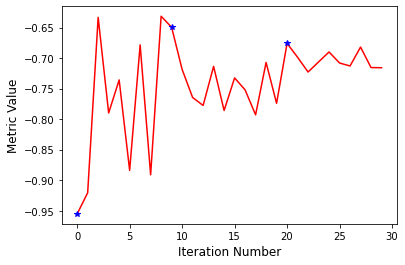

In [16]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(
    learningRate=1.0,
    numberOfIterations=100,
    convergenceMinimumValue=1e-6,
    convergenceWindowSize=10,
)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.
registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
registration_method.AddCommand(
    sitk.sitkMultiResolutionIterationEvent, update_multires_iterations
)
registration_method.AddCommand(
    sitk.sitkIterationEvent, lambda: plot_values(registration_method)
)

final_transform = registration_method.Execute(
    sitk.Cast(fixed_image, sitk.sitkFloat32), sitk.Cast(moving_image, sitk.sitkFloat32)
)

In [18]:
print(f"Final metric value: {registration_method.GetMetricValue()}")
print(
    f"Optimizer's stopping condition, {registration_method.GetOptimizerStopConditionDescription()}"
)

Final metric value: -0.6802881713366341
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.


<h4>Output Registered Images With Sliders</h4>

In [19]:
moving_resampled = sitk.Resample(
    moving_image,
    fixed_image,
    final_transform,
    sitk.sitkLinear,
    0.0,
    moving_image.GetPixelID(),
)

interact(
    display_images_with_alpha,
    image_z=(0, fixed_image.GetSize()[2] - 1),
    alpha=(0.0, 1.0, 0.05),
    fixed=fixed(fixed_image),
    moving=fixed(moving_resampled),
);

interactive(children=(IntSlider(value=66, description='image_z', max=132), FloatSlider(value=0.5, description=…

In [20]:
sitk.WriteTransform(
    final_transform, os.path.join(OUTPUT_DIR, "registered_rigid.tfm")
)